## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Sat Dec 05 23:20:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 457.30       Driver Version: 457.30       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3070   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   39C    P8    13W / 220W |   8075MiB /  8192MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x,flatten=True):
    x=(((x-x.min())/(x.max()-x.min()))-0.5)*2
    if flatten:
        x=x.reshape((len(x),-1))
    return x

def preproc_y(y,num=10):
    if y.shape[-1]==1:
        y=keras.utils.to_categorical(y,num)
    return y

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,256,128,128]):
    input_layer=keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [15]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [17]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [18]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 6ms/step - loss: 1.8212 - accuracy: 0.3479 - val_loss: 1.5257 - val_accuracy: 0.4564
Epoch 2/100
196/196 [==============================] - 1s 4ms/step - loss: 1.4618 - accuracy: 0.4829 - val_loss: 1.4661 - val_accuracy: 0.4785
Epoch 3/100
196/196 [==============================] - 1s 4ms/step - loss: 1.3412 - accuracy: 0.5262 - val_loss: 1.3898 - val_accuracy: 0.5087
Epoch 4/100
196/196 [==============================] - 1s 5ms/step - loss: 1.2329 - accuracy: 0.5639 - val_loss: 1.3677 - val_accuracy: 0.5240
Epoch 5/100
196/196 [==============================] - 1s 5ms/step - loss: 1.1500 - accuracy: 0.5919 - val_loss: 1.3634 - val_accuracy: 0.5212
Epoch 6/100
196/196 [==============================] - 1s 5ms/step - loss: 1.0729 - accuracy: 0.6174 - val_loss: 1.3681 - val_accuracy: 0.5299
Epoch 7/100
196/196 [==============================] - 1s 4ms/step - loss: 0.9810 - accuracy: 0.6515 - val_loss: 1.3853 - val_accuracy: 0.5320

Epoch 58/100
196/196 [==============================] - 1s 4ms/step - loss: 0.0787 - accuracy: 0.9740 - val_loss: 3.9515 - val_accuracy: 0.5268
Epoch 59/100
196/196 [==============================] - 1s 4ms/step - loss: 0.0844 - accuracy: 0.9731 - val_loss: 3.9520 - val_accuracy: 0.5309
Epoch 60/100
196/196 [==============================] - 1s 5ms/step - loss: 0.0899 - accuracy: 0.9708 - val_loss: 4.1012 - val_accuracy: 0.5229
Epoch 61/100
196/196 [==============================] - 1s 5ms/step - loss: 0.1302 - accuracy: 0.9592 - val_loss: 3.7636 - val_accuracy: 0.5274
Epoch 62/100
196/196 [==============================] - 1s 5ms/step - loss: 0.0958 - accuracy: 0.9694 - val_loss: 3.9930 - val_accuracy: 0.5226
Epoch 63/100
196/196 [==============================] - 1s 5ms/step - loss: 0.1020 - accuracy: 0.9668 - val_loss: 4.2654 - val_accuracy: 0.5312
Epoch 64/100
196/196 [==============================] - 1s 5ms/step - loss: 0.0787 - accuracy: 0.9750 - val_loss: 4.0408 - val_accuracy:

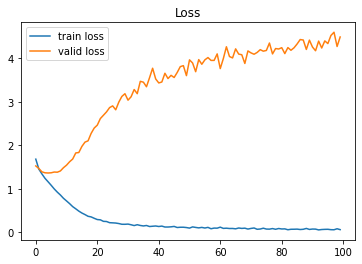

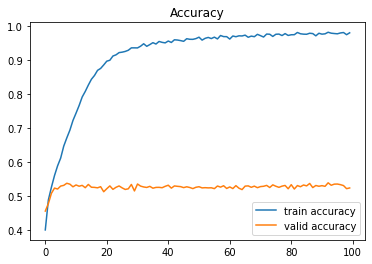

In [19]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()